In [78]:
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
import matplotlib as mpl
import pandas as pd
import seaborn as sns
from pandas.plotting import register_matplotlib_converters
register_matplotlib_converters()

%matplotlib inline

# Import data (Make sure to parse dates. Consider setting index column to 'date'.)
df = pd.read_csv('fcc-forum-pageviews.csv')
df['date'] = pd.to_datetime(df['date'])
df.set_index('date', inplace=True)
# Clean data
df = df[(df['value'] >= df['value'].quantile(0.025)) &
        (df['value'] <= df['value'].quantile(0.975))]
df


,value
date,
2016-05-19,19736
2016-05-26,18060
2016-05-27,19997
2016-05-28,19044
2016-05-29,20325
...,...
2019-11-24,138875
2019-11-29,171584
2019-11-30,141161


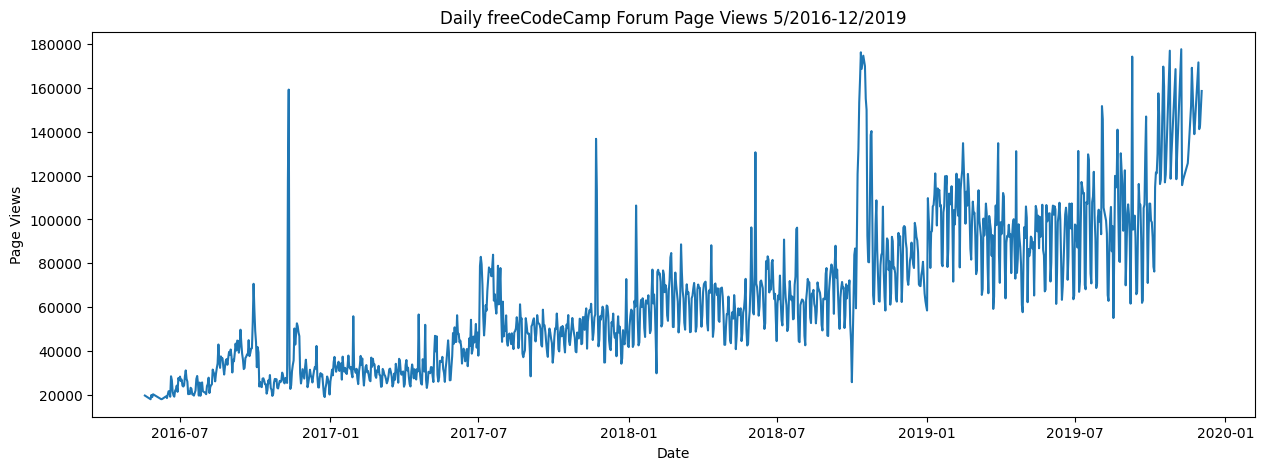

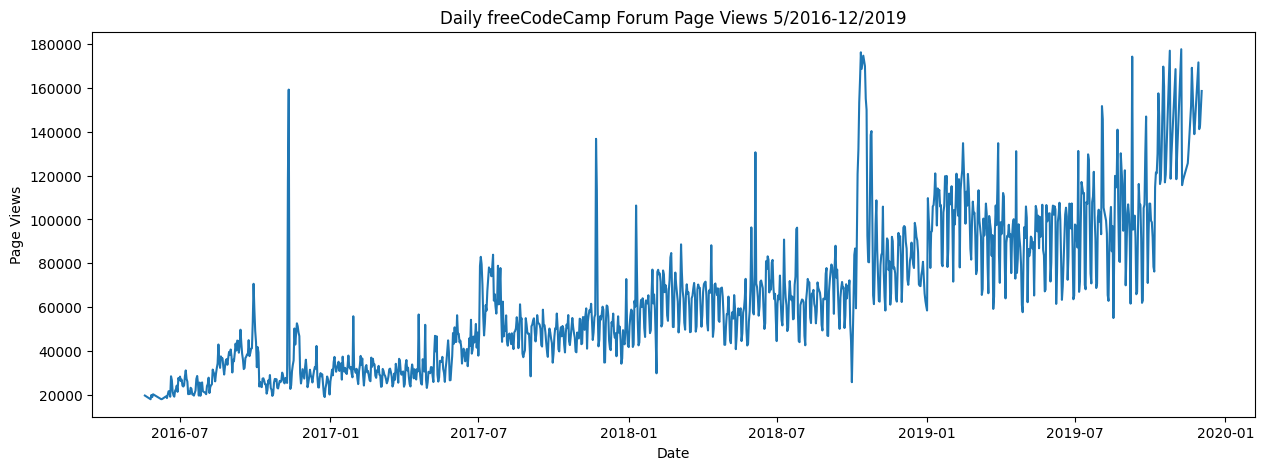

In [79]:
#The title should be Daily freeCodeCamp Forum Page Views 5/2016-12/2019.
# The label on the x axis should be Date and the label on the y axis should be Page Views.
def draw_line_plot():
    # Draw line plot
    fig, ax = plt.subplots(figsize=(15, 5))
    ax.plot(df)
    ax.set_title('Daily freeCodeCamp Forum Page Views 5/2016-12/2019')
    ax.set_xlabel('Date')
    ax.set_ylabel('Page Views')
    ax.xaxis.set_major_locator(mdates.MonthLocator(bymonth=(1, 7)))
    ax.xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m'))

    # Save image and return fig (don't change this part)
    fig.savefig('line_plot.png')
    return fig

draw_line_plot()

In [86]:
def draw_bar_plot():
    # Copy and modify data for monthly bar plot
    df_bar = df.copy()
    df_bar['date_copy'] = df_bar.index
    df_bar['Years'] = df_bar['date_copy'].dt.year
    df_bar['Months'] = df_bar['date_copy'].dt.month_name()
    df_bar.drop(columns=['date_copy'], inplace=True)
    df_bar = df_bar.astype({'value': str})

    # Draw bar plot
    fig, ax = plt.subplots(figsize=(15, 5))
    ax = sns.barplot(
        data = df_bar,
        x = 'Years',
        y = 'value',
        hue = 'Months',
        errorbar = None,
        legend = 'full',
        palette = 'tab10',
        hue_order = ('January', 'February', 'March', 'April', 'May', 'June', 'July', 'August', 'September', 'October', 'November', 'December')
    )
    ax.set_ylabel('Average Page Views')

    # Save image and return fig (don't change this part)
    fig.savefig('bar_plot.png')
    return fig


df_bar = df.copy()
df_bar['date_copy'] = df_bar.index
df_bar['Years'] = df_bar['date_copy'].dt.year
df_bar['Months'] = df_bar['date_copy'].dt.month_name()
df_bar.drop(columns=['date_copy'], inplace=True)
new_row = (pd.DataFrame({
    'value': [0, 0, 0, 0],
    'Years': 2016,
    'Months': ['January', 'February', 'March', 'April']
}))
df_bar = pd.concat([new_row, df_bar])
df_bar

,value,Years,Months
0,0,2016,January
1,0,2016,February
2,0,2016,March
3,0,2016,April
2016-05-19 00:00:00,19736,2016,May
...,...,...,...
2019-11-24 00:00:00,138875,2019,November
2019-11-29 00:00:00,171584,2019,November
2019-11-30 00:00:00,141161,2019,November
2019-12-01 00:00:00,142918,2019,December


49

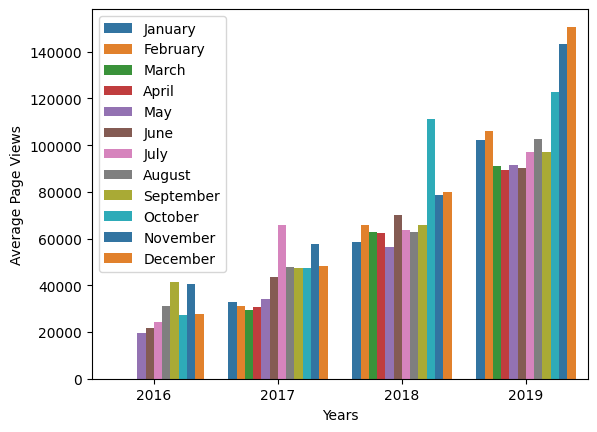

In [88]:
fig, ax = plt.subplots()
ax = sns.barplot(
    data = df_bar,
    x = 'Years',
    y = 'value',
    hue = 'Months',
    errorbar = None,
    legend = 0,
    palette = 'tab10',
)
ax.legend(['January', 'February', 'March', 'April', 'May', 'June', 'July', 'August', 'September', 'October', 'November', 'December'])
ax.set_ylabel('Average Page Views')
len([rect for rect in ax.get_children() if isinstance(rect, mpl.patches.Rectangle)])

In [92]:
df_box = df.copy()
df_box.reset_index(inplace=True)
df_box['Year'] = [d.year for d in df_box.date]
df_box['Month'] = [d.strftime('%b') for d in df_box.date]
df_box.set_index('date', inplace=True)
df_box.rename(columns={'value': 'Page Views'}, inplace=True)
df_box

,Page Views,Year,Month
date,,,
2016-05-19,19736,2016,May
2016-05-26,18060,2016,May
2016-05-27,19997,2016,May
2016-05-28,19044,2016,May
2016-05-29,20325,2016,May
...,...,...,...
2019-11-24,138875,2019,Nov
2019-11-29,171584,2019,Nov
2019-11-30,141161,2019,Nov


<Axes: title={'center': 'Month-wise Box Plot (Seasonality)'}, xlabel='Month', ylabel='Page Views'>

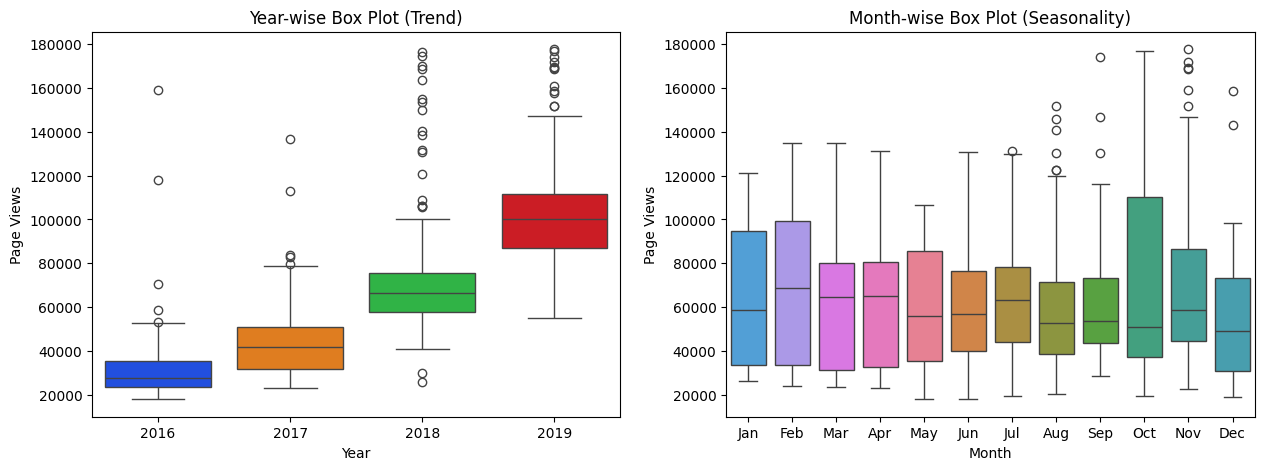

In [93]:
def draw_box_plot():
    # Prepare data for box plots (this part is done!)
    df_box = df_clean.copy()
    df_box.reset_index(inplace=True)
    df_box['Year'] = [d.year for d in df_box.date]
    df_box['Month'] = [d.strftime('%b') for d in df_box.date]
    df_box.set_index('date', inplace=True)
    df_box.rename(columns={'value': 'Page Views'}, inplace=True)

    # Draw box plots (using Seaborn)

    # Save image and return fig (don't change this part)
    fig.savefig('box_plot.png')
    return fig

fig, ax = plt.subplots(1, 2, figsize=(15,5))
ax[0].set_title('Year-wise Box Plot (Trend)')
ax[1].set_title('Month-wise Box Plot (Seasonality)')
sns.boxplot(
    ax = ax[0],
    data = df_box,
    x = 'Year',
    y = 'Page Views',
    hue = 'Year',
    legend = None,
    palette = 'bright'
)
sns.boxplot(
    ax = ax[1],
    data = df_box,
    x = 'Month',
    y = 'Page Views',
    hue = 'Month',
    order = ('Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec')
)